In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import visualkeras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses, Model
from tensorflow.keras import layers, models, Sequential
from sklearn.preprocessing import OneHotEncoder
import joblib
from tensorflow.keras.models import load_model

2021-08-26 15:40:17.237270: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-26 15:40:17.237310: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Get data train and val

In [2]:
data = pd.read_json("../raw_data/splits/train.json")
dataval = pd.read_json("../raw_data/splits/val.json")
datatest = pd.read_json("../raw_data/splits/test.json")

In [3]:
data = data.T
dataval = dataval.T
datatest = datatest.T

In [4]:
data

,author,barcode,country,dec_lat,dec_long,family,genus,image_name,image_path,infraspecific_epithet,primary_division,specific_epithet,subfamily,subspecific_epithet,token
0000e73d-4d1e-4241-a577-88103fc0961c,"(Mayer, 1851)",ETHZ-ENT0012714,Switzerland,46.31,7.8,Pieridae,Pieris,ETHZ_ENT01_2017_04_03_010614.JPG,2017_04_03R,None,Valais,mannii,Pierinae,None,0000e73d-4d1e-4241-a577-88103fc0961c
000156fb-6f29-4057-b26f-eca7ce9e9460,"(Hübner, 1806)",ETHZ-ENT0015323,Switzerland,46.76594,9.89316,Pieridae,Pieris,ETHZ_ENT01_2017_04_07_013503.JPG,2017_04_07R,None,Grisons,bryoniae,Pierinae,None,000156fb-6f29-4057-b26f-eca7ce9e9460
00025400-f7bd-477b-9363-18defd2d5466,"(Linnaeus, 1767)",ETHZ-ENT0019906,Morocco,30.2804,-9.1599,Lycaenidae,Leptotes,ETHZ_ENT01_2017_04_24_018779.JPG,2017_04_24R,None,Souss-Massa,pirithous,Polyommatinae,None,00025400-f7bd-477b-9363-18defd2d5466
0006c590-29cd-4a3d-8d81-26023ac346a0,"(Rottemburg, 1775)",ETHZ-ENT0013615,Switzerland,47.37659,7.740225,Nymphalidae,Melitaea,ETHZ_ENT01_2017_04_06_012762.JPG,2017_04_06R,None,Basel-Landschaft,athalia,Nymphalinae,None,0006c590-29cd-4a3d-8d81-26023ac346a0
000b01ec-1bc7-4a3c-8599-0ad88fa654e3,"(Denis & Schiffermüller, 1775)",ETHZ-ENT0042254,Switzerland,47.36836,7.73113,Nymphalidae,Erebia,ETHZ_ENT01_2017_06_13_043879.JPG,2017_06_13R,None,Basel-Landschaft,medusa,Satyrinae,None,000b01ec-1bc7-4a3c-8599-0ad88fa654e3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14ce36f1-427c-11ea-871b-887873dd81ef,"Bremer, 1864",ETHZ-ENT0012306,Russia,None,None,Nymphalidae,Erebia,ETHZ_ENT01_2017_03_31_010161.JPG,2017_03_31R,None,Primorsky,wanga,Satyrinae,None,14ce36f1-427c-11ea-871b-887873dd81ef
14ce36f2-427c-11ea-91d2-887873dd81ef,"Butler, 1868",ETHZ-ENT0012301,Spain,None,None,Nymphalidae,Erebia,ETHZ_ENT01_2017_03_31_010156.JPG,2017_03_31R,None,Andalusia,hispania,Satyrinae,None,14ce36f2-427c-11ea-91d2-887873dd81ef
14ce36f3-427c-11ea-ab8b-887873dd81ef,"(Gerhard, 1850)",ETHZ-ENT0013111,Turkey,None,None,Lycaenidae,Lycaena,ETHZ_ENT01_2017_04_04_011035.JPG,2017_04_04R,None,None,asabinus,Lycaeninae,None,14ce36f3-427c-11ea-ab8b-887873dd81ef
14ce36f4-427c-11ea-a529-887873dd81ef,"(Klug, 1832)",ETHZ-ENT0039040,Palestine,None,None,Nymphalidae,Ypthima,ETHZ_ENT01_2017_06_06_040263.JPG,2017_06_06R,None,Jericho,asterope,Satyrinae,None,14ce36f4-427c-11ea-a529-887873dd81ef


# Data preprocessing (feature creation)

In [5]:
data['species'] = data['genus']+'_'+data['specific_epithet']
dataval['species'] = dataval['genus']+'_'+dataval['specific_epithet']
datatest['species'] = datatest['genus']+'_'+datatest['specific_epithet']

In [6]:
data["path_to_image"]="../raw_data/IMG/"+data["image_name"]
dataval["path_to_image"]="../raw_data/IMG/"+dataval["image_name"]
datatest["path_to_image"]="../raw_data/IMG/"+datatest["image_name"]

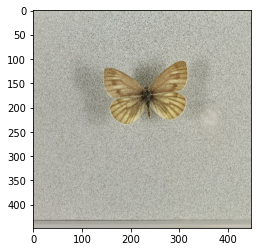

In [7]:
img = Image.open(data["path_to_image"][1])
plt.imshow(img)

In [8]:
datasample = data.sample(1000,random_state = 818)
datavalsample = dataval.sample(200,random_state = 818)
datatestsample = datatest.sample(200,random_state = 818)

# Image encoding and resize

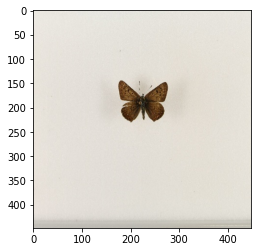

In [9]:
imageoriginal = []
for i in datasample['path_to_image'] :
    img = Image.open(i)
    imageoriginal.append(np.array(img))
img = imageoriginal[0]
plt.imshow(img)

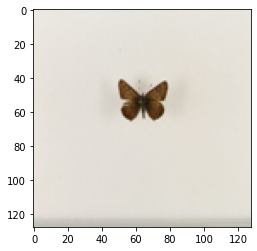

In [10]:
image = []
for i in datasample['path_to_image'] :
    img = Image.open(i)
    img = img.resize((128,128))
    image.append(np.array(img))
img = image[0]
plt.imshow(img)

In [11]:
imageval = []
for i in datavalsample['path_to_image'] :
    img = Image.open(i)
    img=img.resize((128,128))
    imageval.append(np.array(img))

In [12]:
len(image),image[0].shape

(1000, (128, 128, 3))

In [13]:
imagetest = []
for i in datatestsample['path_to_image'] :
    img = Image.open(i)
    img=img.resize((128,128))
    imagetest.append(np.array(img))

# Preparation X,y,X_val,y_val

In [14]:
X = np.array(image)
y=np.array(datasample["species"])

In [15]:
X_val = np.array(imageval)
y_val =np.array(datavalsample["species"])

In [16]:
X_test = np.array(imagetest)
y_test =np.array(datatestsample["species"])

In [17]:
y.shape,y_val.shape

((1000,), (200,))

In [18]:
X.shape,X_val.shape,X_test.shape,y.shape, y_val.shape,y_test.shape

((1000, 128, 128, 3),
 (200, 128, 128, 3),
 (200, 128, 128, 3),
 (1000,),
 (200,),
 (200,))

In [19]:
y = y.reshape(1000,1)
y_val = y_val.reshape(200,1)
y_test = y_test.reshape(200,1)

In [20]:
y.shape,y_val.shape

((1000, 1), (200, 1))

In [21]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

ohe.fit(y)
y_cat = ohe.transform(y)
y_val_cat = ohe.transform(y_val)
y_test_cat = ohe.transform(y_test)

In [22]:
y_cat.shape,y_val_cat.shape,y_test_cat

((1000, 248),
 (200, 248),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [28]:
pd.DataFrame(y_cat).nunique().sum()

496

# Add last layers

In [24]:
base_model = tf.keras.applications.ResNet152(weights = 'imagenet', 
                                             include_top = False, input_shape = (128,128,3))



2021-08-26 10:14:35.673588: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-26 10:14:35.673644: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-26 10:14:35.673675: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-AIVORVQ0): /proc/driver/nvidia/version does not exist
2021-08-26 10:14:35.674117: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


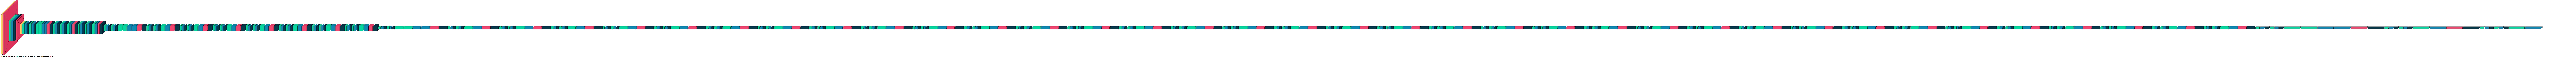

In [25]:
visualkeras.layered_view(base_model, legend=True)

In [26]:
def set_nontrainable_layers(model):
    # Set the first layers to be untrainable
    #Layer(model,name = layers_name_list[1],trainable=False)
    #model.layers[1]=Layer(trainable=False, name=layers_name_list[1])
    #model = compile_model(model)
    for layer in model.layers: layer.trainable = False
    return model

In [27]:
def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainables, and add additional trainable layers on top'''
    model = set_nontrainable_layers(model)

    flattening_layer = layers.Flatten()
    dense_layer = layers.Dense(130, activation='relu')
    prediction_layer = layers.Dense(248, activation='softmax')

    model = Sequential([model,flattening_layer,dense_layer,prediction_layer])
    return model

In [28]:
model = add_last_layers(base_model)

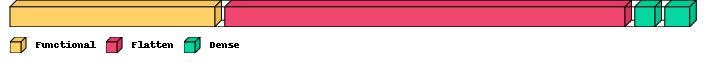

In [29]:
visualkeras.layered_view(model, legend=True)

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Functional)       (None, 4, 4, 2048)        58370944  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 130)               4259970   
_________________________________________________________________
dense_1 (Dense)              (None, 248)               32488     
Total params: 62,663,402
Trainable params: 4,292,458
Non-trainable params: 58,370,944
_________________________________________________________________


In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Model training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X, y_cat,validation_data=(X_val,y_val_cat),
          epochs=50, 
          verbose=1,
          batch_size=32,
         callbacks=[es])

2021-08-26 10:14:59.318499: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
32/32 [==============================] - 114s 3s/step - loss: 5.6076 - accuracy: 0.0700 - val_loss: 4.1849 - val_accuracy: 0.0850
Epoch 2/50
32/32 [==============================] - 101s 3s/step - loss: 4.6894 - accuracy: 0.1200 - val_loss: 4.1497 - val_accuracy: 0.0900
Epoch 3/50
32/32 [==============================] - 96s 3s/step - loss: 4.3359 - accuracy: 0.1680 - val_loss: 3.9638 - val_accuracy: 0.1150
Epoch 4/50
32/32 [==============================] - 56s 2s/step - loss: 3.9860 - accuracy: 0.1890 - val_loss: 3.7191 - val_accuracy: 0.1250
Epoch 5/50
32/32 [==============================] - 52s 2s/step - loss: 3.7169 - accuracy: 0.2480 - val_loss: 3.6182 - val_accuracy: 0.1800
Epoch 6/50
32/32 [==============================] - 53s 2s/step - loss: 3.3678 - accuracy: 0.2880 - val_loss: 3.7525 - val_accuracy: 0.1600
Epoch 7/50
32/32 [==============================] - 47s 1s/step - loss: 3.1007 - accuracy: 0.3360 - val_loss: 3.3914 - val_accuracy: 0.2200
Epoch 8/50
32/32 [

In [ ]:
history.history

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_ylim(0., 5)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

In [ ]:
plot_history(history)

In [ ]:
X_test.shape,y_test.shape

In [ ]:
model.evaluate(X_test,y_test_cat)

In [ ]:
model.save("ResNet152_128")